In [1]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

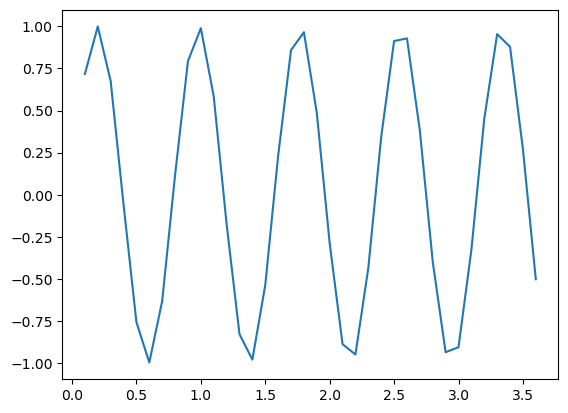

In [2]:
data_analyse_file="dummy_data_3.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

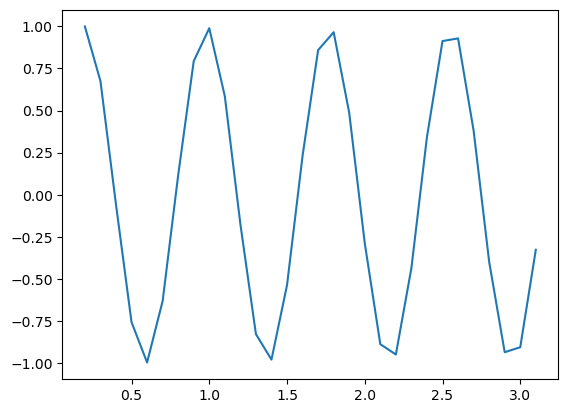

0.2
3.1


In [3]:
start_point_index=1
end_point_index=31
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index]
power_peak_search=pow_array[start_point_index:end_point_index]
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])

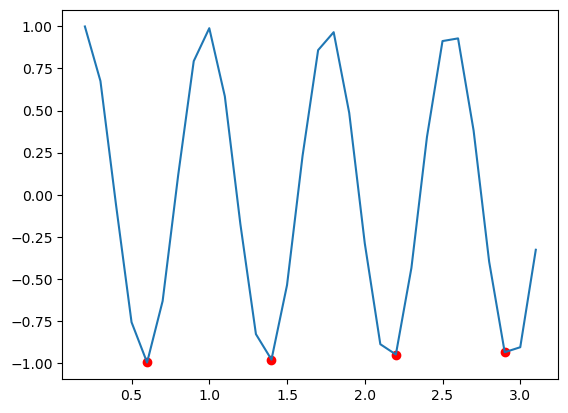

In [4]:
wvlen_step_size=0.1
approx_fsr=0.75
promin_use=0.5
dist_use=(approx_fsr/2)/wvlen_step_size
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red")
plt.show()

In [5]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[0.8 0.8 0.7]
0.7666666666666666
0.03333333333333346
